In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')
import sys

sys.path.append('..')

hepatitis = pd.read_csv('HepatitisDataset/hepatitis.csv')
hepatitis.shape

(155, 20)

In [2]:
hepatitis.isna().value_counts()

Class  AGE    SEX    STEROID  ANTIVIRALS  FATIGUE  MALAISE  ANOREXIA  LIVER BIG  LIVER FIRM  SPLEEN PALPABLE  SPIDERS  ASCITES  VARICES  BILIRUBIN  ALK PHOSPHATE  SGOT   ALBUMIN  PROTIME  HISTOLOGY
False  False  False  False    False       False    False    False     False      False       False            False    False    False    False      False          False  False    False    False        155
dtype: int64

In [3]:
hepatitis['Class'] = hepatitis['Class'] - 1

In [4]:
X = hepatitis.iloc[:,1:]
y = hepatitis['Class']

In [5]:
from sklearn.model_selection import train_test_split

train, test, labels_train, labels_test = train_test_split(X, y,
                                                          train_size=0.8,
                                                          random_state=2022,
                                                          stratify=y)

from imblearn.over_sampling import SMOTE
train, labels_train = SMOTE(random_state=2022).fit_resample(train, labels_train)

In [6]:
categorical_features = np.argwhere(
    np.array([len(set(X.iloc[:, x])) for x in range(X.shape[1])]) <= 10).flatten()
categorical_features

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 18], dtype=int64)

In [7]:
categorical_features = np.argwhere(
    np.array([len(set(X.iloc[:, x])) for x in range(X.shape[1])]) <= 10).flatten()
categorical_features

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 18], dtype=int64)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Activation, Dense, Dropout
from keras.utils import to_categorical

model = RandomForestClassifier(random_state=2022)
# model = AdaBoostClassifier(random_state=2022)
# model = GradientBoostingClassifier(random_state=2022)
# labels_train2 = to_categorical(labels_train, 2)
# labels_test2 = to_categorical(labels_test, 2)
# model = Sequential()
# model.add(Dense(32, activation='relu', input_dim=30))
# model.add(Dropout(0.2))
# model.add(Dense(2, activation='softmax'))
# model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
# model.fit(train, labels_train2, batch_size=32, epochs=50, validation_data=(test, labels_test2))
model.fit(train, labels_train)

Using TensorFlow backend.


RandomForestClassifier(random_state=2022)

In [9]:
pred_origin = model.predict_proba(test)
pred_origin = np.argmax(pred_origin, axis=1)
pred_origin[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [10]:
from sklearn.preprocessing import MinMaxScaler

feature_importances = MinMaxScaler().fit_transform(model.feature_importances_.reshape(-1, 1))
feature_importances = feature_importances.flatten()
feature_importances

array([0.3913763 , 0.06358018, 0.05553548, 0.        , 0.14042234,
       0.30034904, 0.02861435, 0.08136005, 0.09787342, 0.20141868,
       0.62481374, 0.5711862 , 0.32902048, 0.70560085, 0.31756432,
       0.30128886, 1.        , 0.19295612, 0.04428099])

In [11]:
import lime
import lime.lime_tabular

feature_names = hepatitis.columns.values.tolist()[1:]
explainer = lime.lime_tabular.LimeTabularExplainer(train.values, feature_names=feature_names
                                                   , categorical_features=categorical_features
                                                   , verbose=False
                                                   , mode='classification'
                                                   , random_state=2022
                                                   # , discretize_continuous = False
                                                   , kernel='rational'
                                                   )

4.952085350565988e-05
0.9999431865025453
{0: [(11, array([0.5])), (16, array([0.49941936])), (13, array([0.38808644])), (12, array([0.36163113])), (0, array([0.360807])), (10, array([0.32141646])), (1, array([0.31514381])), (9, array([0.29792056])), (15, array([0.24565652])), (6, array([0.21086253])), (4, array([0.20546063])), (17, array([0.17070734])), (3, array([0.15913091])), (5, array([0.11161088])), (2, array([0.11142341])), (8, array([0.08620066])), (14, array([0.00389289])), (7, array([0.00038159])), (18, array([0.]))], 1: [(16, array([0.5])), (11, array([0.37339597])), (13, array([0.34535512])), (10, array([0.32892949])), (12, array([0.31759045])), (1, array([0.2984845])), (0, array([0.27759314])), (15, array([0.26692185])), (9, array([0.23447539])), (6, array([0.21136615])), (4, array([0.17596065])), (3, array([0.14849454])), (2, array([0.14701584])), (17, array([0.14403317])), (8, array([0.09752917])), (5, array([0.07539138])), (18, array([0.04420633])), (7, array([0.01791447

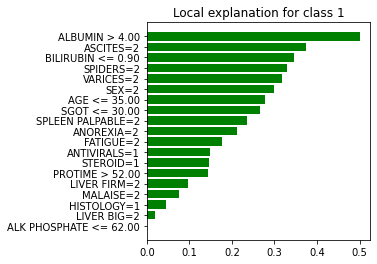

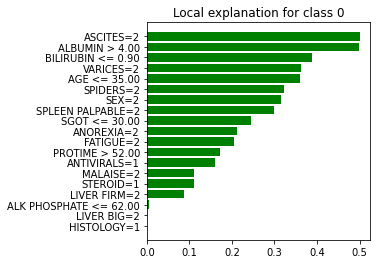

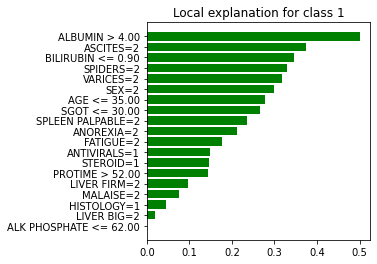

In [12]:
exp = explainer.explain_instance(test.values[25], model.predict_proba, num_features=19,
                                 labels=(0, 1), num_samples=5000
                                 , model_regressor='ensemble'
                                 )
print(exp.local_pred[0])
print(exp.local_pred[1])
print(exp.local_exp)
exp.as_pyplot_figure(label=0)
exp.as_pyplot_figure(label=1)

In [13]:
top_num = int(test.shape[0] * 0.2)
print(top_num)
top_index = np.argsort(np.max(model.predict_proba(test), axis=1))[:top_num]
top_test = test.iloc[top_index]
print(top_test)

6
     AGE  SEX  STEROID  ANTIVIRALS  FATIGUE  MALAISE  ANOREXIA  LIVER BIG  \
142   51    1        2           2        1        2         2          2   
83    67    2        1           2        1        1         2          2   
137   38    1        2           2        2        2         2          2   
109   33    1        1           2        1        1         2          2   
41    23    1        2           2        2        2         2          0   
147   70    1        1           2        1        1         1          0   

     LIVER FIRM  SPLEEN PALPABLE  SPIDERS  ASCITES  VARICES  BILIRUBIN  \
142           1                1        1        2        1        1.0   
83            2                0        0        0        0        1.5   
137           1                2        1        2        1        1.6   
109           2                2        2        1        2        0.7   
41            0                0        0        0        0        4.6   
147           

In [14]:
import tqdm as td
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist
pred_lime = []
cos_sim_list = []
pearson_sim_list = []
coef_sort_list = []
euclidean_sim = []
for k in td.tqdm(test.values):
# for k in td.tqdm(top_test.values):
    exp = explainer.explain_instance(k, model.predict_proba, num_features=19, labels=(0, 1)
                                     ,model_regressor='ensemble'
                                     # , inverse_method='ahc'
                                     , num_samples=5000
                                     # , inverse_method='nn'
                                     # , model_regressor='linear'
                                     # , model_regressor='DecisionTreeClassifier'
                                     )
    # print(exp.local_pred)
    pred_lime.append([exp.local_pred[0], exp.local_pred[1]])
    coef_list = np.zeros(len(feature_names))
    # print(len(exp.local_exp))
    for i in exp.local_exp:
        # print(exp.local_exp[i])
        for j in exp.local_exp[i]:
            if isinstance(j[1], np.ndarray):
                # coef_list[j[0]] += j[1].tolist()[0]
                coef_list[j[0]] += abs(j[1].tolist()[0])
            else:
                # coef_list[j[0]] += j[1]
                coef_list[j[0]] += abs(j[1])
    coef_list = coef_list / len(exp.local_exp)

    sort_index = np.argsort(-np.abs(coef_list))
    coef_sort = np.zeros(len(coef_list))
    for index, i in enumerate(sort_index):
        coef_sort[i] = index
    coef_sort_list.append(coef_sort)

    coef_list = MinMaxScaler().fit_transform(coef_list.reshape(-1, 1)).flatten()
    # print(coef_list)
    importance_coef = []
    importance_coef.append(feature_importances.tolist())
    importance_coef.append(coef_list.tolist())
    # print(importance_coef)
    # print('cos_sim:', cosine_similarity(importance_coef)[0][1])
    cos_sim_list.append(cosine_similarity(importance_coef)[0][1])
    pearson_sim_list.append(np.corrcoef(importance_coef)[0][1])
    euclidean_sim.append(1 / (1 + np.sqrt(np.sum((np.array(importance_coef[0]) - np.array(importance_coef[1])) ** 2))))
print('cos_sim:', np.sum(cos_sim_list) / len(cos_sim_list))
pearson_sim_list = np.nan_to_num(pearson_sim_list, nan=0)
print('pearson_sim:', np.sum(np.abs(pearson_sim_list)) / len(pearson_sim_list))
print('j-distance:', np.average(pdist(np.array(coef_sort_list), 'jaccard')))
print('eucliden_sim:', np.sum(euclidean_sim) / len(euclidean_sim))

100%|██████████| 31/31 [00:21<00:00,  1.45it/s]

cos_sim: 0.8001297939698911
pearson_sim: 0.5388708460821344
j-distance: 0.9228384581525498
eucliden_sim: 0.4554739885571641


In [15]:
pred_lime = np.argmax(pred_lime, axis=1)
pred_lime[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [16]:
from sklearn.metrics import classification_report

print('\nClassification Report:\n', classification_report(labels_test, pred_origin, digits=4))


Classification Report:
               precision    recall  f1-score   support

           0     0.5000    0.6667    0.5714         6
           1     0.9130    0.8400    0.8750        25

    accuracy                         0.8065        31
   macro avg     0.7065    0.7533    0.7232        31
weighted avg     0.8331    0.8065    0.8162        31



In [17]:
print('\nClassification Report:\n', classification_report(labels_test, pred_lime, digits=4))


Classification Report:
               precision    recall  f1-score   support

           0     0.5000    0.6667    0.5714         6
           1     0.9130    0.8400    0.8750        25

    accuracy                         0.8065        31
   macro avg     0.7065    0.7533    0.7232        31
weighted avg     0.8331    0.8065    0.8162        31



In [18]:

print('\nClassification Report:\n', classification_report(pred_origin, pred_lime, digits=4))



Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         8
           1     1.0000    1.0000    1.0000        23

    accuracy                         1.0000        31
   macro avg     1.0000    1.0000    1.0000        31
weighted avg     1.0000    1.0000    1.0000        31

